<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test p-value: 0.998676061630249
D'Agostino and Pearson's Test p-value: 0.8469858390291811
Total Blood Pressure: 1199786.4016631574
Mean Blood Pressure: 119.97864016631574
Variance of Blood Pressure: 100.68360554106486


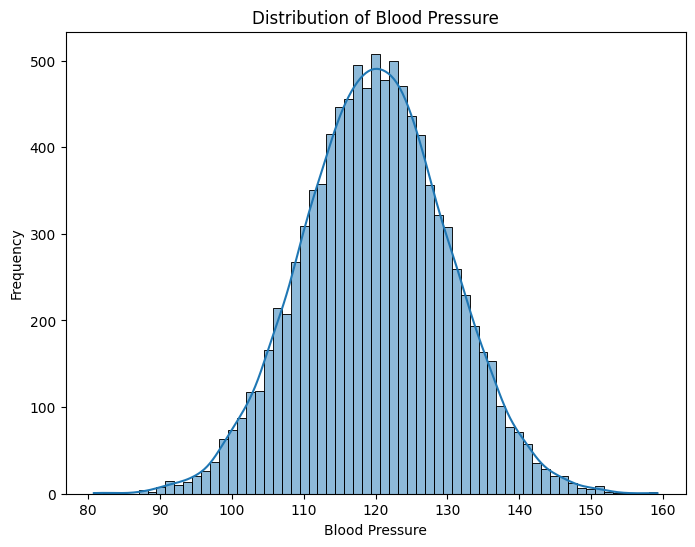

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest
from google.colab import files  # Import the files module

# Set a random seed for reproducibility
np.random.seed(42)

# Generate blood pressure data for 10000 people
num_people = 10000
mean_bp = 120
std_dev_bp = 10

blood_pressure = np.random.normal(mean_bp, std_dev_bp, size=num_people)

# Create a DataFrame to store the data
data = pd.DataFrame({
    'Person_ID': range(1, num_people + 1),
    'Blood_Pressure': blood_pressure
})

# Save the DataFrame to a CSV file
data.to_csv('blood_pressure_data.csv', index=False)

# Download the CSV file
files.download('blood_pressure_data.csv')

# Read the blood pressure data from the CSV file
data = pd.read_csv('blood_pressure_data.csv')

# Extract the blood pressure values
blood_pressure = data['Blood_Pressure']

# Perform normality tests
shapiro_stat, shapiro_p = shapiro(blood_pressure)
d_agostino_stat, d_agostino_p = normaltest(blood_pressure)

# Display normality test results
print("Shapiro-Wilk Test p-value:", shapiro_p)
print("D'Agostino and Pearson's Test p-value:", d_agostino_p)

# Calculate total blood pressure, mean, and variance
total_bp = np.sum(blood_pressure)
mean_bp = np.mean(blood_pressure)
variance_bp = np.var(blood_pressure)

print("Total Blood Pressure:", total_bp)
print("Mean Blood Pressure:", mean_bp)
print("Variance of Blood Pressure:", variance_bp)

# Plot a histogram
plt.figure(figsize=(8, 6))
sns.histplot(blood_pressure, kde=True)
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.show()


   Interval Start  Interval End  Calculated PDF
0              20            40          0.0000
1              40            60          0.0000
2              60            80          0.0000
3              80           100          0.0230
4             100           120          0.4778
5             120           140          0.4755
6             140           160          0.0237
7             160           180          0.0000
8             180           200          0.0000


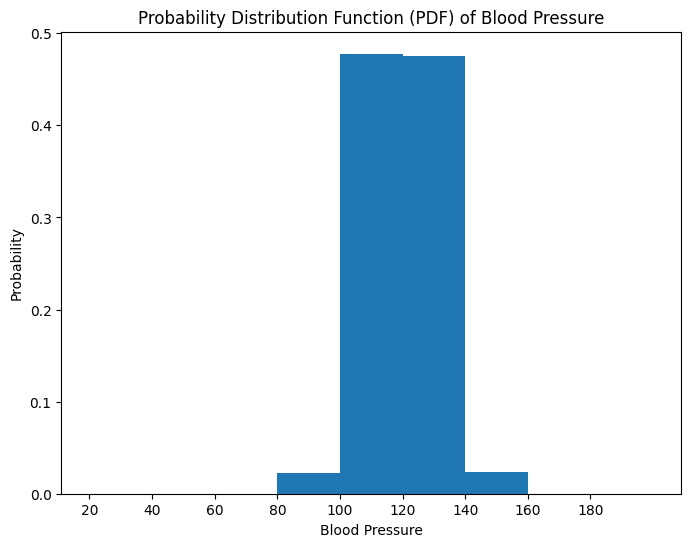

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set a random seed for reproducibility
np.random.seed(42)

# Generate blood pressure data for 10000 people
num_people = 10000
mean_bp = 120
std_dev_bp = 10

blood_pressure = np.random.normal(mean_bp, std_dev_bp, size=num_people)

# Create a DataFrame to store the data
data = pd.DataFrame({
    'Person_ID': range(1, num_people + 1),
    'Blood_Pressure': blood_pressure
})

# Read the blood pressure data from the DataFrame
blood_pressure_data = data['Blood_Pressure']

# Calculate PDF for blood pressure in intervals of 20
intervals = np.arange(20, 181, 20)
pdf_values = []

for interval_start in intervals:
    interval_end = interval_start + 20
    pdf = len(blood_pressure_data[(blood_pressure_data >= interval_start) & (blood_pressure_data < interval_end)]) / num_people
    pdf_values.append(pdf)

# Create a DataFrame to store the results in a tabular form
pdf_table = pd.DataFrame({
    'Interval Start': intervals,
    'Interval End': intervals + 20,
    'Calculated PDF': pdf_values
})

# Print the PDF table
print(pdf_table)

# Plot the PDF
plt.figure(figsize=(8, 6))
plt.bar(pdf_table['Interval Start'], pdf_table['Calculated PDF'], width=20, align='edge')
plt.title('Probability Distribution Function (PDF) of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Probability')
plt.xticks(np.arange(20, 181, 20))
plt.show()


   Blood Pressure (a)  Calculated CDF (Formula)  Theoretical CDF (Normal Dist)
0                  20                    0.0000                   7.619853e-24
1                  40                    0.0000                   6.220961e-16
2                  50                    0.0000                   1.279813e-12
3                 100                    0.0230                   2.275013e-02
4                 120                    0.5008                   5.000000e-01
5                 140                    0.9763                   9.772499e-01
6                 180                    1.0000                   1.000000e+00


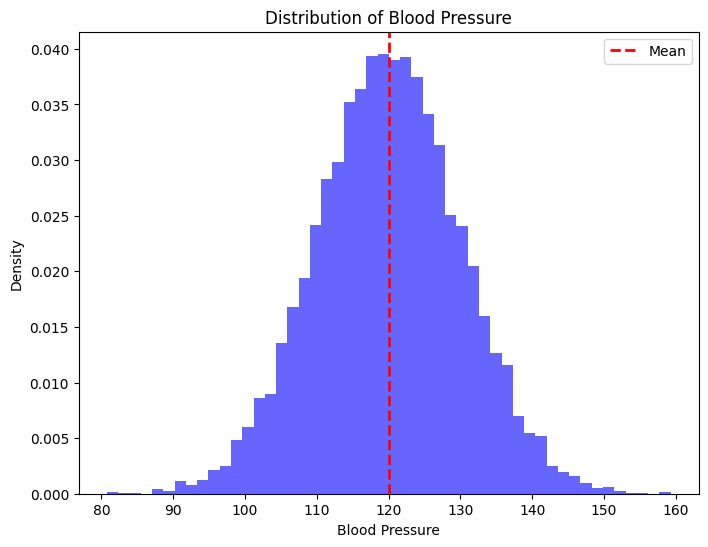

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set a random seed for reproducibility
np.random.seed(42)

# Generate blood pressure data for 10000 people
num_people = 10000
mean_bp = 120
std_dev_bp = 10

blood_pressure = np.random.normal(mean_bp, std_dev_bp, size=num_people)

# Calculate CDF for specified blood pressure values
specified_values = [20, 40, 50, 100, 120, 140, 180]
cdf_calculated = [np.sum(blood_pressure <= val) / num_people for val in specified_values]

# Calculate CDF using the cumulative distribution function of a normal distribution
cdf_theoretical = [norm.cdf(val, loc=mean_bp, scale=std_dev_bp) for val in specified_values]

# Create a DataFrame to store the calculation steps
calculation_steps = pd.DataFrame({
    'Blood Pressure (a)': specified_values,
    'Calculated CDF (Formula)': cdf_calculated,
    'Theoretical CDF (Normal Dist)': cdf_theoretical
})

# Print the calculation steps in tabular form
print(calculation_steps)

# Plot a histogram
plt.figure(figsize=(8, 6))
plt.hist(blood_pressure, bins=50, density=True, alpha=0.6, color='b')
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Density')
plt.axvline(mean_bp, color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()
plt.show()


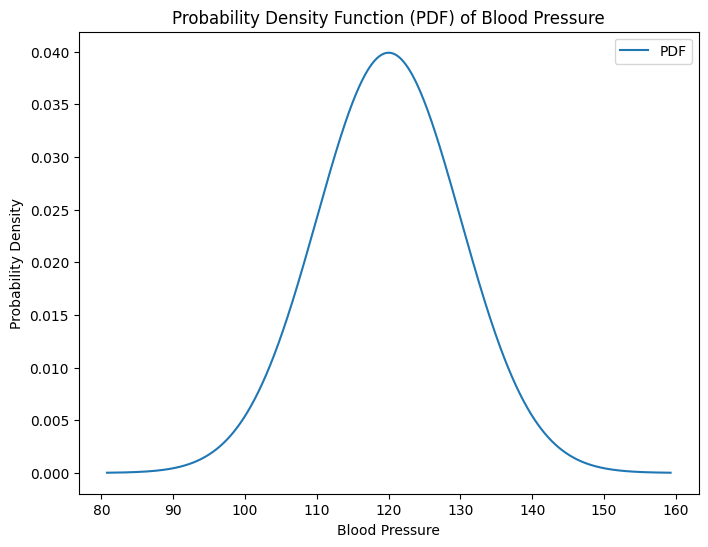

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set a random seed for reproducibility
np.random.seed(42)

# Generate blood pressure data for 10000 people
num_people = 10000
mean_bp = 120
std_dev_bp = 10

blood_pressure = np.random.normal(mean_bp, std_dev_bp, size=num_people)

# Step 1: Calculate PDF for a range of blood pressure values
x = np.linspace(min(blood_pressure), max(blood_pressure), 1000)
pdf_values = norm.pdf(x, loc=mean_bp, scale=std_dev_bp)

# Step 2: Plot the PDF
plt.figure(figsize=(8, 6))
plt.plot(x, pdf_values, label='PDF')
plt.title('Probability Density Function (PDF) of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


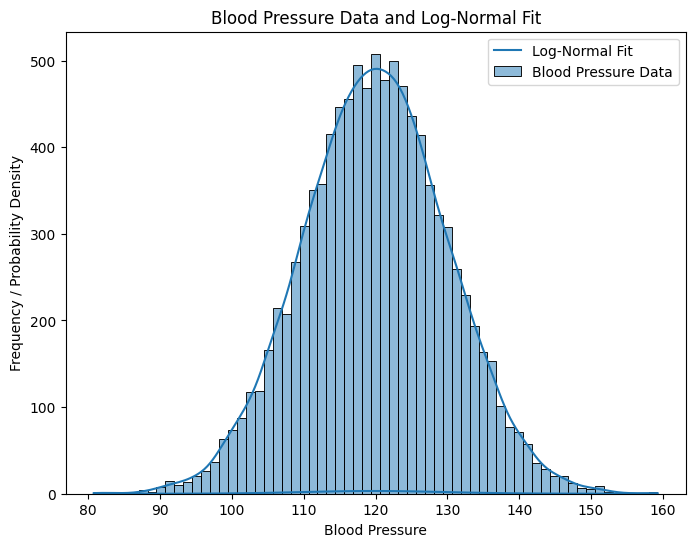

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import lognorm
from google.colab import files  # Import the files module

# Set a random seed for reproducibility
np.random.seed(42)

# Generate blood pressure data for 10000 people
num_people = 10000
mean_bp = 120
std_dev_bp = 10

blood_pressure = np.random.normal(mean_bp, std_dev_bp, size=num_people)

# Create a DataFrame to store the data
data = pd.DataFrame({
    'Person_ID': range(1, num_people + 1),
    'Blood_Pressure': blood_pressure
})

# Save the DataFrame to a CSV file
data.to_csv('blood_pressure_data.csv', index=False)

# Read the blood pressure data from the CSV file
data = pd.read_csv('blood_pressure_data.csv')

# Extract the blood pressure values
blood_pressure = data['Blood_Pressure']

# Fit a Log-Normal distribution to the data
params = lognorm.fit(blood_pressure)
shape, loc, scale = params

# Plot the histogram of the data along with the fitted Log-Normal distribution
plt.figure(figsize=(8, 6))
sns.histplot(blood_pressure, kde=True, label='Blood Pressure Data')
x = np.linspace(min(blood_pressure), max(blood_pressure), 100)
pdf = lognorm.pdf(x, shape, loc, scale)
plt.plot(x, pdf * num_people * (max(blood_pressure) - min(blood_pressure)) / len(blood_pressure), label='Log-Normal Fit')
plt.title('Blood Pressure Data and Log-Normal Fit')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency / Probability Density')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk Test p-value (Original Data): 0.998676061630249
D'Agostino and Pearson's Test p-value (Original Data): 0.8469858390291811
Shapiro-Wilk Test p-value (Log-Normal Transformed Data): 2.7851383512292847e-15
D'Agostino and Pearson's Test p-value (Log-Normal Transformed Data): 6.297629056081275e-27


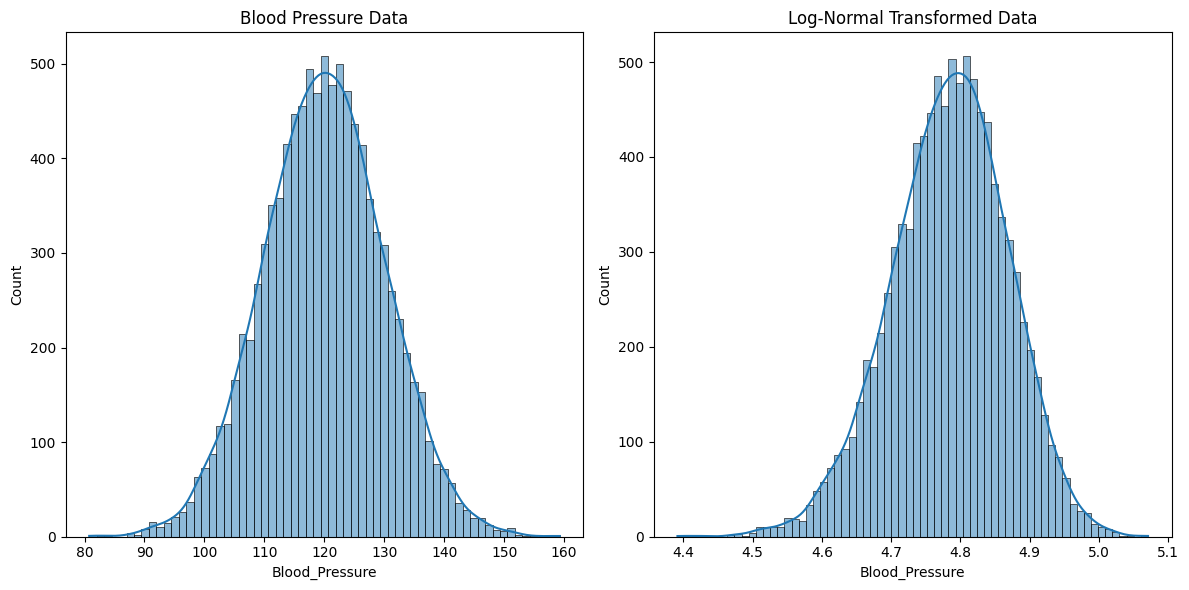

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import lognorm, normaltest, shapiro
from google.colab import files  # Import the files module

# Set a random seed for reproducibility
np.random.seed(42)

# Generate blood pressure data for 10000 people
num_people = 10000
mean_bp = 120
std_dev_bp = 10

blood_pressure = np.random.normal(mean_bp, std_dev_bp, size=num_people)

# Create a DataFrame to store the data
data = pd.DataFrame({
    'Person_ID': range(1, num_people + 1),
    'Blood_Pressure': blood_pressure
})

# Save the DataFrame to a CSV file
data.to_csv('blood_pressure_data.csv', index=False)

# Read the blood pressure data from the CSV file
data = pd.read_csv('blood_pressure_data.csv')

# Extract the blood pressure values
blood_pressure = data['Blood_Pressure']

# Perform normality tests (Shapiro-Wilk and D'Agostino and Pearson's tests)
shapiro_stat, shapiro_p = shapiro(blood_pressure)
d_agostino_stat, d_agostino_p = normaltest(blood_pressure)

# Fit a Log-Normal distribution to the data
params = lognorm.fit(blood_pressure)
shape, loc, scale = params

# Perform normality test on the Log-Normal transformed data
log_blood_pressure = np.log(blood_pressure)
log_shapiro_stat, log_shapiro_p = shapiro(log_blood_pressure)
log_d_agostino_stat, log_d_agostino_p = normaltest(log_blood_pressure)

# Display normality test results
print("Shapiro-Wilk Test p-value (Original Data):", shapiro_p)
print("D'Agostino and Pearson's Test p-value (Original Data):", d_agostino_p)
print("Shapiro-Wilk Test p-value (Log-Normal Transformed Data):", log_shapiro_p)
print("D'Agostino and Pearson's Test p-value (Log-Normal Transformed Data):", log_d_agostino_p)

# Plot histograms of original and log-transformed data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(blood_pressure, kde=True)
plt.title('Blood Pressure Data')

plt.subplot(1, 2, 2)
sns.histplot(log_blood_pressure, kde=True)
plt.title('Log-Normal Transformed Data')

plt.tight_layout()
plt.show()


In [12]:
# Generate blood pressure data for 10000 people
num_people = 10000
mean_bp = 120
std_dev_bp = 10

blood_pressure = np.random.normal(mean_bp, std_dev_bp, size=num_people)

# Perform normality tests (Shapiro-Wilk and D'Agostino and Pearson's tests) on the original data
shapiro_stat, shapiro_p = shapiro(blood_pressure)
d_agostino_stat, d_agostino_p = normaltest(blood_pressure)

# Fit a Log-Normal distribution to the data
params = lognorm.fit(blood_pressure)
shape, loc, scale = params

# Log-Normal distribution parameters:
# shape: shape parameter of the distribution
# loc: location parameter (usually 0 for Log-Normal)
# scale: scale parameter of the distribution

# Transform the data to log-space
log_blood_pressure = np.log(blood_pressure)

# Perform normality tests on the log-transformed data
log_shapiro_stat, log_shapiro_p = shapiro(log_blood_pressure)
log_d_agostino_stat, log_d_agostino_p = normaltest(log_blood_pressure)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


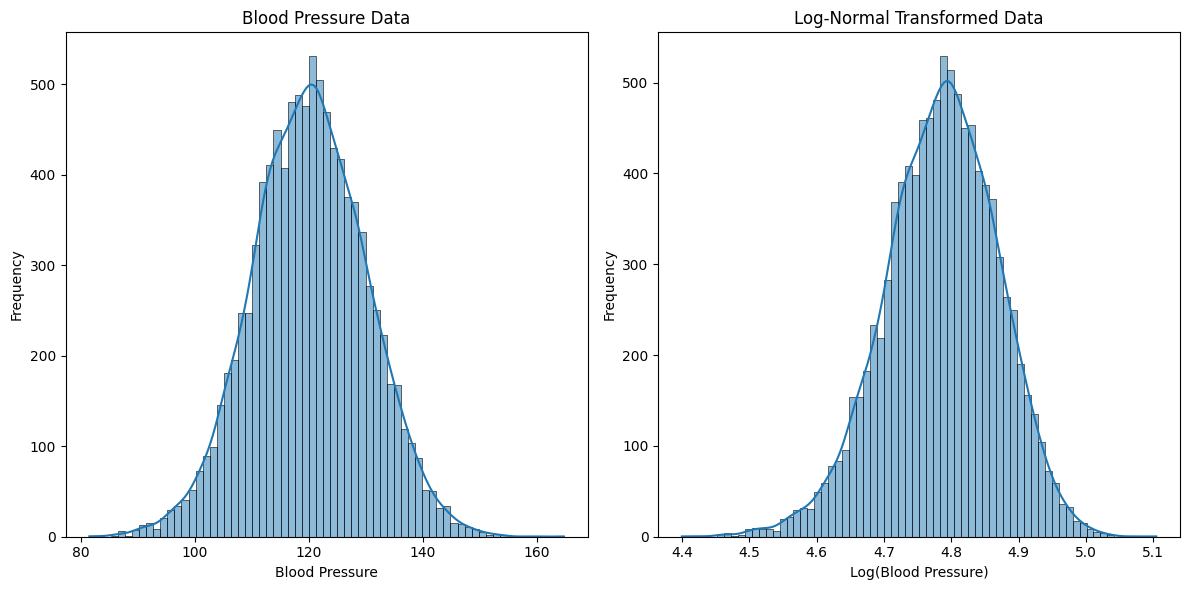

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(blood_pressure, kde=True)
plt.title('Blood Pressure Data')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(log_blood_pressure, kde=True)
plt.title('Log-Normal Transformed Data')
plt.xlabel('Log(Blood Pressure)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


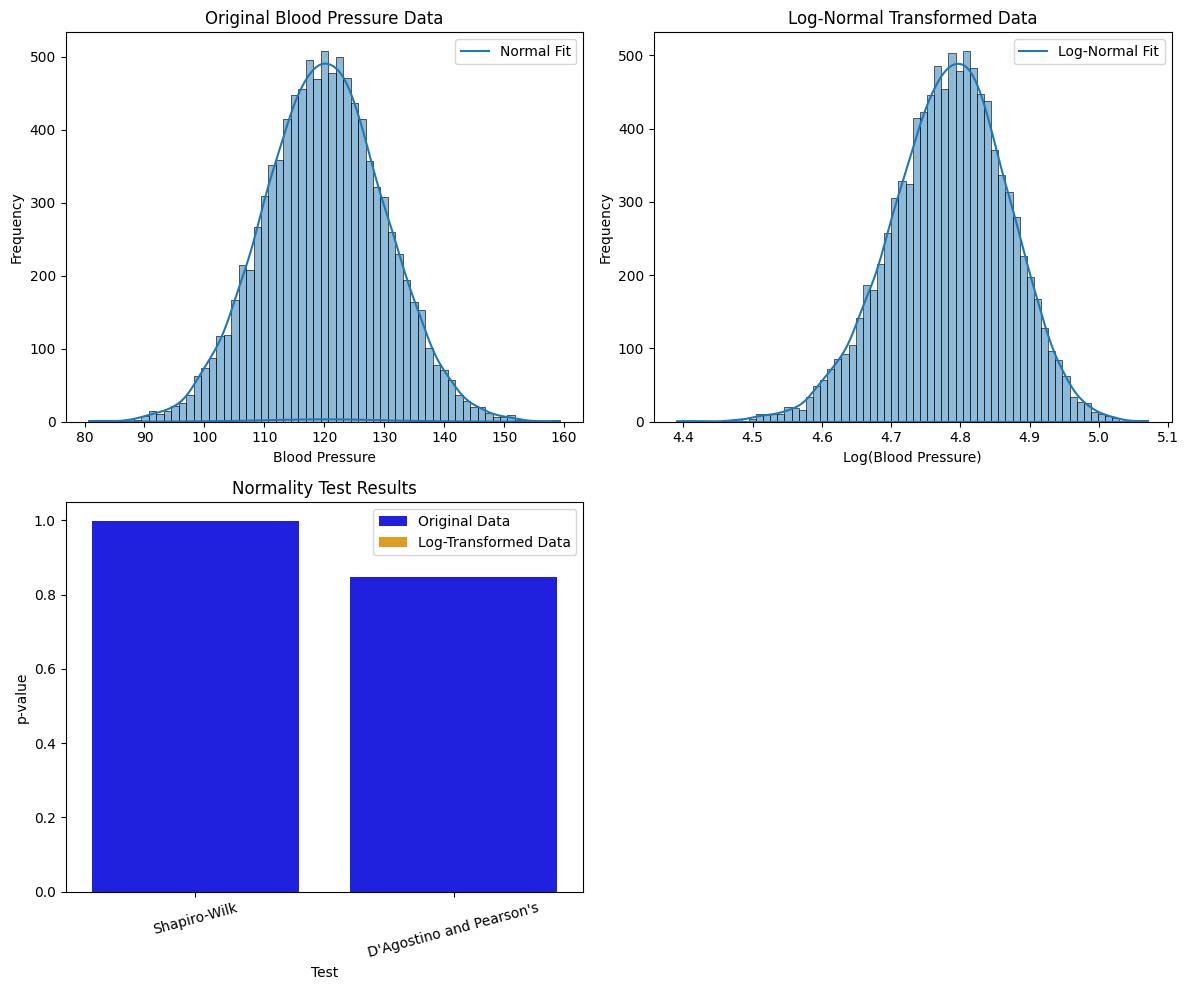

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, lognorm, normaltest, shapiro
from google.colab import files  # Import the files module

# Set a random seed for reproducibility
np.random.seed(42)

# Generate blood pressure data for 10000 people
num_people = 10000
mean_bp = 120
std_dev_bp = 10

blood_pressure = np.random.normal(mean_bp, std_dev_bp, size=num_people)

# Create a DataFrame to store the data
data = pd.DataFrame({
    'Person_ID': range(1, num_people + 1),
    'Blood_Pressure': blood_pressure
})

# Save the DataFrame to a CSV file
data.to_csv('blood_pressure_data.csv', index=False)

# Read the blood pressure data from the CSV file
data = pd.read_csv('blood_pressure_data.csv')

# Extract the blood pressure values
blood_pressure = data['Blood_Pressure']

# Perform normality tests (Shapiro-Wilk and D'Agostino and Pearson's tests) on the original data
shapiro_stat, shapiro_p = shapiro(blood_pressure)
d_agostino_stat, d_agostino_p = normaltest(blood_pressure)

# Fit a Normal distribution to the data
mean_normal, std_normal = norm.fit(blood_pressure)

# Fit a Log-Normal distribution to the data
params_log = lognorm.fit(blood_pressure)
shape_log, loc_log, scale_log = params_log

# Transform the data to log-space
log_blood_pressure = np.log(blood_pressure)

# Perform normality tests on the log-transformed data
log_shapiro_stat, log_shapiro_p = shapiro(log_blood_pressure)
log_d_agostino_stat, log_d_agostino_p = normaltest(log_blood_pressure)

# Visualization
plt.figure(figsize=(12, 10))

# Original Data Histogram and Normal Distribution Fit
plt.subplot(2, 2, 1)
sns.histplot(blood_pressure, kde=True)
plt.title('Original Blood Pressure Data')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')

x_normal = np.linspace(min(blood_pressure), max(blood_pressure), 100)
pdf_normal = norm.pdf(x_normal, mean_normal, std_normal)
plt.plot(x_normal, pdf_normal * len(blood_pressure) * (max(blood_pressure) - min(blood_pressure)) / len(blood_pressure), label='Normal Fit')
plt.legend()

# Log-Transformed Data Histogram and Log-Normal Distribution Fit
plt.subplot(2, 2, 2)
sns.histplot(log_blood_pressure, kde=True)
plt.title('Log-Normal Transformed Data')
plt.xlabel('Log(Blood Pressure)')
plt.ylabel('Frequency')

x_log_normal = np.linspace(min(log_blood_pressure), max(log_blood_pressure), 100)
pdf_log_normal = lognorm.pdf(x_log_normal, shape_log, loc_log, scale_log)
plt.plot(x_log_normal, pdf_log_normal * len(blood_pressure) * (max(log_blood_pressure) - min(log_blood_pressure)) / len(log_blood_pressure), label='Log-Normal Fit')
plt.legend()

# Normality Test Results
plt.subplot(2, 2, 3)
test_results = pd.DataFrame({
    'Test': ['Shapiro-Wilk', "D'Agostino and Pearson's"],
    'Original Data p-value': [shapiro_p, d_agostino_p],
    'Log-Transformed Data p-value': [log_shapiro_p, log_d_agostino_p]
})
sns.barplot(data=test_results, x='Test', y='Original Data p-value', color='blue', label='Original Data')
sns.barplot(data=test_results, x='Test', y='Log-Transformed Data p-value', color='orange', label='Log-Transformed Data')
plt.title('Normality Test Results')
plt.ylabel('p-value')
plt.xticks(rotation=15)
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
import numpy as np
import pandas as pd
from scipy.stats import lognorm
from google.colab import files  # Import the files module

# Set a random seed for reproducibility
np.random.seed(42)

# Generate blood pressure data for 10000 people
num_people = 10000
mean_bp = 120
std_dev_bp = 10

blood_pressure = np.random.normal(mean_bp, std_dev_bp, size=num_people)

# Create a DataFrame to store the data
data = pd.DataFrame({
    'Person_ID': range(1, num_people + 1),
    'Blood_Pressure': blood_pressure
})

# Save the DataFrame to a CSV file
data.to_csv('blood_pressure_data.csv', index=False)

# Read the blood pressure data from the CSV file
data = pd.read_csv('blood_pressure_data.csv')

# Fit a Log-Normal distribution to the data
params_log = lognorm.fit(data['Blood_Pressure'])
shape_log, loc_log, scale_log = params_log

# Calculate and print CDF values for specified intervals
intervals = np.arange(20, 161, 20)

print("Interval\tCDF Value")
print("--------------------------")
for interval_end in intervals:
    interval_start = interval_end - 20
    cdf_value = lognorm.cdf(interval_end, s=shape_log, loc=loc_log, scale=scale_log) - lognorm.cdf(interval_start, s=shape_log, loc=loc_log, scale=scale_log)
    print(f"{interval_start}-{interval_end}\t{cdf_value:.6f}")


Interval	CDF Value
--------------------------
0-20	0.000000
20-40	0.000000
40-60	0.000000
60-80	0.000018
80-100	0.021511
100-120	0.482514
120-140	0.471508
140-160	0.024392


In [16]:
import numpy as np
from scipy.stats import lognorm

# Parameters of the Log-Normal distribution (you should use the parameters from your fitted distribution)
shape_log = 1.5
loc_log = 0
scale_log = 0.3

# Calculate and print PDF values for specific blood pressure values
blood_pressure_values = [100, 120, 90, 140]

print("Blood Pressure\tPDF Value")
print("--------------------------")
for bp in blood_pressure_values:
    pdf_value = lognorm.pdf(bp, s=shape_log, loc=loc_log, scale=scale_log)
    print(f"{bp}\t{pdf_value:.6f}")


Blood Pressure	PDF Value
--------------------------
100	0.000001
120	0.000001
90	0.000002
140	0.000000
